In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
def read_chunks(file, cols=None, city=None, chunk_size=500000):
    df = pd.read_json(path_or_buf=file, chunksize=chunk_size, lines=True)

    chunk_list = []
    for chunk in tqdm(df, desc=file):
        if city:
            chunk = chunk[chunk['city'] == city]
        if cols is None:
            chunk_list.append(chunk)
        else:
            chunk_list.append(chunk[cols])
    
    return pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

In [3]:
city_of_interest = 'Indianapolis'

business_data = read_chunks('../yelp_dataset/yelp_academic_dataset_business.json', city=city_of_interest)
business_ids = business_data['business_id'].unique()

df = read_chunks('../yelp_dataset/yelp_academic_dataset_tip.json')
df = df[df['business_id'].isin(business_ids)]

../yelp_dataset/yelp_academic_dataset_business.json: 0it [00:00, ?it/s]

../yelp_dataset/yelp_academic_dataset_tip.json: 0it [00:00, ?it/s]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55325 entries, 55 to 908910
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           55325 non-null  object        
 1   business_id       55325 non-null  object        
 2   text              55325 non-null  object        
 3   date              55325 non-null  datetime64[ns]
 4   compliment_count  55325 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.5+ MB


In [5]:
df.head()

,user_id,business_id,text,date,compliment_count
55,rSeQlwsBuWzKZYKac7r8Gw,UFCN0bYdHroPKu6KV5CJqg,Best lunch/ happy hour in downtown!!! Kenny ro...,2016-08-01 20:50:52,0
66,VwiYJN6BxqtW_zF8hefhmQ,wrgtmWOkq1FwnlSgl6QcJg,Drinks with Jess :),2011-10-12 23:17:47,0
76,SgxD74-CkftmYxm2-KNKgg,o1PhBVppw2EtNw9pw_-pVQ,"Michelob on tap. No lie. And, a very fine burg...",2013-06-01 19:39:39,0
84,QEpNF4Hag6_W9Stc-1Frvg,iBRcuymkhTk6mjC3Decs5g,Their Gluten Free section is in the back of th...,2013-09-07 07:27:19,0
88,zYFGMy1_thjMnvQLX6JNBw,L2ppV5eK9krUkcQivDqr7Q,Not a bad seat in the place,2013-03-03 00:51:06,0


In [6]:
df.duplicated().sum()

2

In [7]:
df.drop_duplicates(inplace=True)

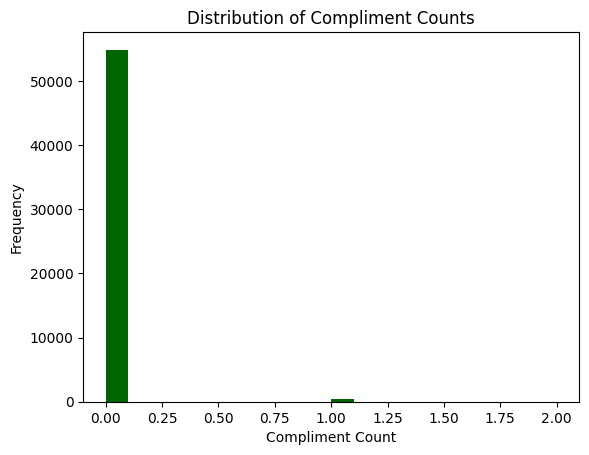

In [9]:
plt.hist(df['compliment_count'], bins=20, color='darkgreen')
plt.title('Distribution of Compliment Counts')
plt.xlabel('Compliment Count')
plt.ylabel('Frequency')
plt.show()

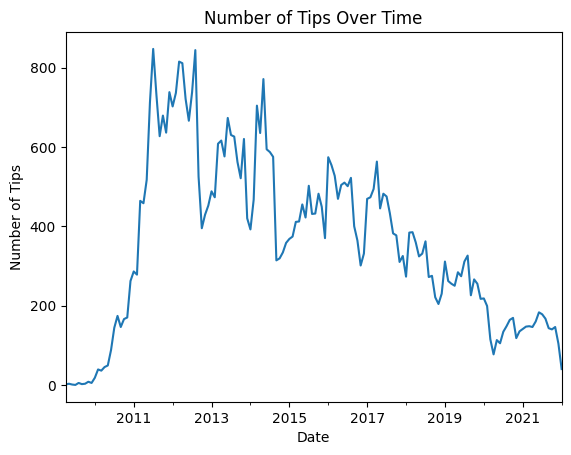

In [10]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.resample('ME').size().plot()
plt.title('Number of Tips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tips')
plt.show()